In [53]:
import dlib
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [54]:
# Load dlib's face detector
detector = dlib.get_frontal_face_detector()

# Load the pre-trained facial landmark predictor
predictor = dlib.shape_predictor("shape_predictor_81_face_landmarks.dat")

# Load the face image
img = cv2.imread('./faces library/Hermione2.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [55]:
# Make a copy for drawing landmarks
img_with_landmarks = img_rgb.copy()

# Detect faces in the image
faces = detector(img_with_landmarks)

# Loop through each face detected
for face in faces:
    # Get the landmarks/parts for the face
    shape = predictor(img_with_landmarks, face)
    
    # Draw dots on each landmark.
    for part in shape.parts():
        cv2.circle(img_with_landmarks, (part.x, part.y), 10, (0, 255, 0), -1)


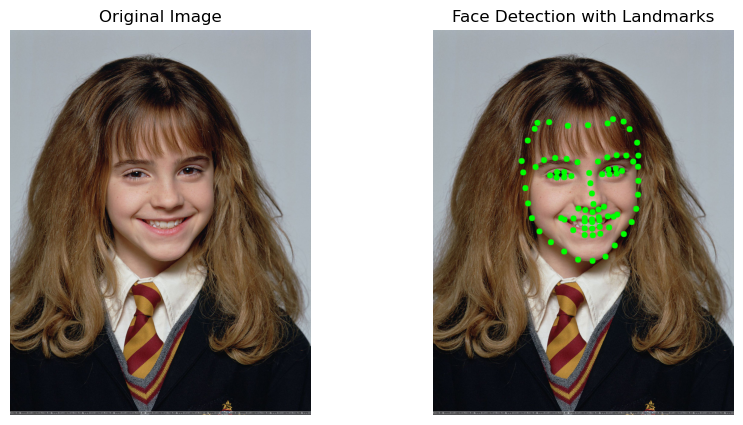

In [56]:
# Display both the original and detected images using matplotlib
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

# Image with Detected Facial Landmarks
plt.subplot(1, 2, 2)
plt.imshow(img_with_landmarks)
plt.title('Face Detection with Landmarks')
plt.axis('off')

plt.show()

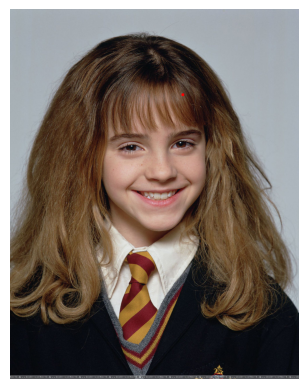

In [57]:
# Shows the highest forehead point of the original image

img_with_markers = img_rgb.copy()

for face in faces:
    landmarks = predictor(img_rgb, face)

    # Assuming that the landmarks 68 to 80 are for the forehead
    forehead = [landmarks.part(i) for i in range(68, 81)]

    # Calculate the y-coordinate of the highest point of the forehead
    highest_point = min(forehead, key=lambda point: point.y)

    # Draw a red dot at the highest point of the forehead
    cv2.circle(img_with_markers, (highest_point.x, highest_point.y), 5, (255, 0, 0), -1)

# Display the image with the highest point marked
plt.imshow(img_with_markers)
plt.axis('off')
plt.show()


In [58]:
# Function to overlay a transparent image onto another image
def overlay_transparent(background, overlay, x, y):
    bg_height, bg_width = background.shape[:2]
    if x >= bg_width or y >= bg_height:
        return background

    h, w = overlay.shape[:2]
    if x + w > bg_width:
        w = bg_width - x
        overlay = overlay[:, :w]

    if y + h > bg_height:
        h = bg_height - y
        overlay = overlay[:h]

    if overlay.shape[2] < 4:
        overlay = np.concatenate([overlay, np.ones((overlay.shape[0], overlay.shape[1], 1), dtype=overlay.dtype) * 255], axis=2)

    overlay_img = overlay[..., :3]
    mask = overlay[..., 3:] / 255.0

    background[y:y+h, x:x+w] = (1.0 - mask) * background[y:y+h, x:x+w] + mask * overlay_img

    return background

In [59]:

# Load ears image with alpha channel using PIL
ears_pil = Image.open('./stickers library/ears/fluffy-bunny-ear.png')

# Convert to RGBA if not already in RGBA mode
ears_rgba = ears_pil.convert('RGBA')

# A copy of the original image
img_with_stickers = img_rgb.copy()

for face in faces:
    landmarks = predictor(img_rgb, face)

    # Assuming that the landmarks 68 to 80 are for the forehead
    forehead = [landmarks.part(i) for i in range(68, 81)]

    # Calculate the bounding box for the ears based on the eye landmarks
    ears_width = int(abs(forehead[0].x - forehead[-1].x) * 2) 
    ears_height = int(ears_width * ears_rgba.height / ears_rgba.width)

    # Resize the ears image
    resized_ears_pil = ears_rgba.resize((ears_width, ears_height))

    # Calculate the position for the ears
    y1 = min([point.y for point in forehead]) - int(0.6 * ears_width)
    y2 = y1 + ears_height
    x1 = forehead[0].x - int(0.2 * ears_width) 
    x2 = x1 + ears_width

    # Convert PIL image to NumPy array
    ears_np = np.array(resized_ears_pil)

    # Overlay the ears on the image
    img_with_stickers = overlay_transparent(img_with_stickers, ears_np, x1, y1)


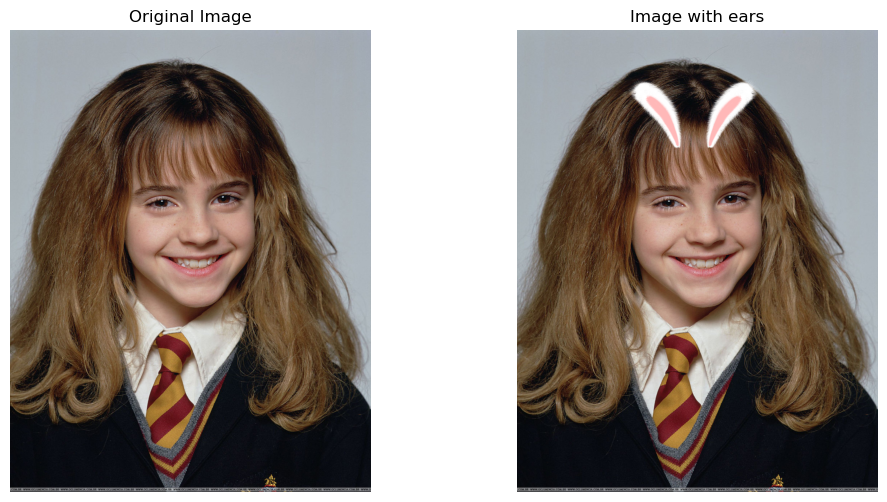

In [60]:
# Display the original and detected images using Matplotlib
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_with_stickers)
plt.title('Image with ears')
plt.axis('off')

plt.show()

In [61]:
# # Function to convert transparent image to be rgb
# from PIL import Image
# import matplotlib.pyplot as plt

# # Load the image with PIL
# image_pil = Image.open('./stickers library/ears/pink-bunny-ears.png')

# # Convert to RGBA if not already in RGBA mode
# image_rgba = image_pil.convert('RGBA')

# # Plot the image
# plt.imshow(image_rgba)
# plt.axis('off')  # Turn off axis
# plt.show()
